# Descrição da Base de Dados ClassicHits

Esta base de dados contém **15,150 clássicos da música** de **3,083 artistas**, abrangendo **um século de história musical** de 1923 a 2023. Os dados estão organizados em **19 gêneros distintos**, permitindo a análise da evolução da música ao longo do tempo.

## Variáveis Selecionadas

Aqui estão as **variáveis** que serão usadas para a análise:

1. **Track**: O título da música.
2. **Artist**: O nome do artista ou banda que interpreta.
3. **Year**: O ano em que a faixa foi lançada.
4. **Duration**: Duração da faixa em milissegundos.
5. **Time_Signature**: A assinatura de compasso musical da faixa (ex: 4/4).
6. **Danceability**: Uma medida de quão adequada a faixa é para dançar, variando de 0,0 a 1,0.
7. **Energy**: Uma medida da intensidade e atividade da faixa, variando de 0,0 a 1,0.
8. **Key**: A chave da faixa (ex: 0=C).
9. **Loudness**: O volume geral da faixa em decibéis (dB).
10. **Mode**: A modalidade da faixa, tipicamente maior (1) ou menor (0).
11. **Speechiness**: Uma medida indicando a presença de palavras faladas na faixa, variando de 0,0 a 1,0.
12. **Acousticness**: Uma medida de quão acústica é a faixa, variando de 0,0 a 1,0.
13. **Instrumentalness**: Uma medida da probabilidade de a faixa ser instrumental, variando de 0,0 a 1,0.
14. **Liveness**: Uma medida da presença de um público ao vivo na faixa, variando de 0,0 a 1,0.
15. **Valence**: Uma medida da positividade musical da faixa, variando de 0,0 a 1,0.
16. **Tempo**: A velocidade da faixa em batidas por minuto (BPM).
17. **Popularity**: Uma medida da popularidade da faixa, variando de 0 a 100.
18. **Genre**: Gênero da faixa.

### Autor do Readme:

<a href="https://github.com/Kevinl284">
    <img src="https://github.com/Kevinl284.png" width="100" height="100" />
</a>

ProjetoA3: Inteligência Artificial
2024.2 manhã


<h1>Meus imports:</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
import warnings
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
warnings.filterwarnings('ignore')

<h1>Carrega os dados do DF:</h1>

In [2]:
# Lê o arquivo CSV e carrega os dados em um DataFrame
data = pd.read_csv('../input/basehits/ClassicHit.csv')

<h1>Mostra um pouco do DF:</h1>

In [3]:
# Mostra as primeiras 5 linhas do DataFrame para visualização inicial
data.head()

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


<h1>Mostra o tipo de dados e a quantidade de valores:</h1>

In [4]:
# Exibe o tipo de dados e a quantidade de valores não nulos em cada coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

<h1>Faz a descrição básica das colunas numéricas:</h1>

In [5]:
# Descreve estatísticas básicas como média, desvio padrão, min, max, etc. das colunas numéricas
data.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,15150.000000,1.515000e+04,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000
mean,1984.709769,2.413028e+05,3.921650,0.574667,0.617691,5.257624,-9.154545,0.696634,0.075791,0.302651,0.091046,0.200062,0.571146,120.664078,43.025809
std,19.482460,1.057966e+05,0.348322,0.166208,0.239527,3.569713,4.289558,0.459727,0.077704,0.317793,0.229075,0.175196,0.250969,29.181107,20.788038
min,1899.000000,2.300000e+04,0.000000,0.000000,0.000098,0.000000,-47.359000,0.000000,0.000000,0.000001,0.000000,0.012400,0.000000,0.000000,0.000000
25%,1971.000000,1.803700e+05,4.000000,0.461000,0.442000,2.000000,-11.736750,0.000000,0.034325,0.024225,0.000000,0.091900,0.371000,98.672500,28.000000
50%,1983.000000,2.228525e+05,4.000000,0.582000,0.644000,5.000000,-8.480500,1.000000,0.046400,0.167000,0.000084,0.130000,0.586000,118.777000,44.000000
75%,1998.000000,2.751530e+05,4.000000,0.696000,0.819000,8.000000,-5.955500,1.000000,0.078400,0.557000,0.012400,0.257000,0.782000,138.073250,59.000000
max,2024.000000,3.060650e+06,5.000000,0.988000,0.999000,11.000000,0.919000,1.000000,0.950000,0.996000,0.987000,0.996000,0.989000,219.973000,98.000000


<h1>Mostra a matriz do DF:</h1>

In [6]:
# Mostra a forma do DataFrame, ou seja, a quantidade de linhas e colunas
print("Data Shape:",data.shape)

Data Shape: (15150, 18)


<h1>Retornará valores ausentes em cada coluna:</h1>

In [7]:
# Retorna a contagem de valores ausentes (NaN) em cada coluna
data.isnull().sum()

Track               0
Artist              0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Genre               0
dtype: int64

<h1>Gráfico simples para gêneros:</h1>

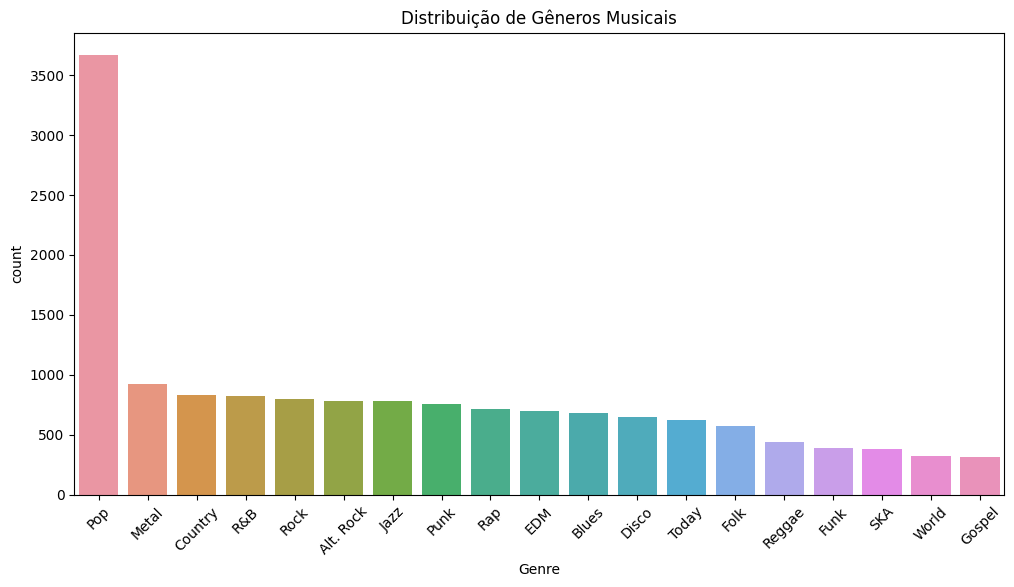

In [8]:
# Gráfico de distribuição de gêneros
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Genre', order=data['Genre'].value_counts().index)
plt.title('Distribuição de Gêneros Musicais')
plt.xticks(rotation=45)
plt.show()

<h1>Filtro para os 3 generos mais presentes no DF:</h1>

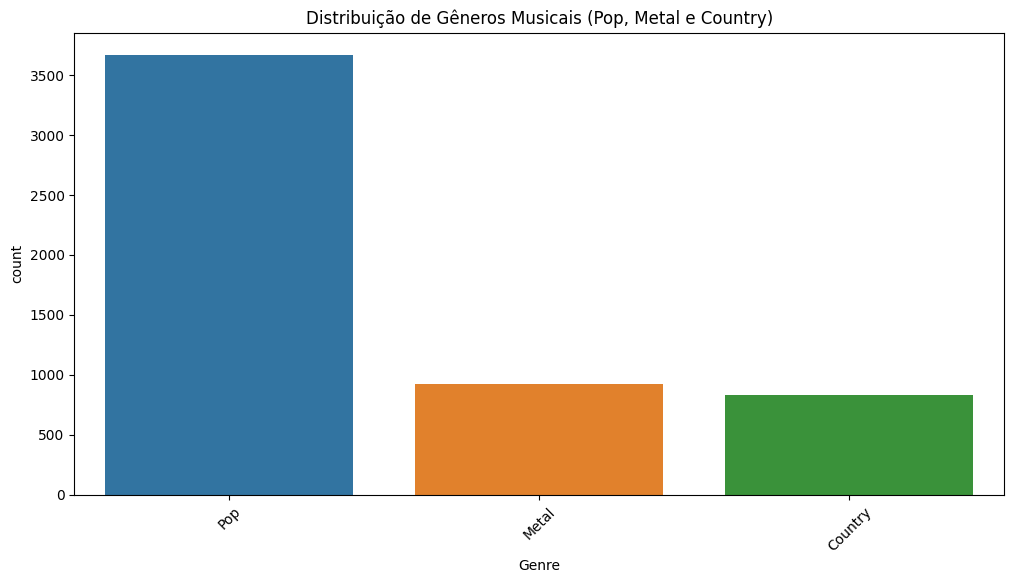

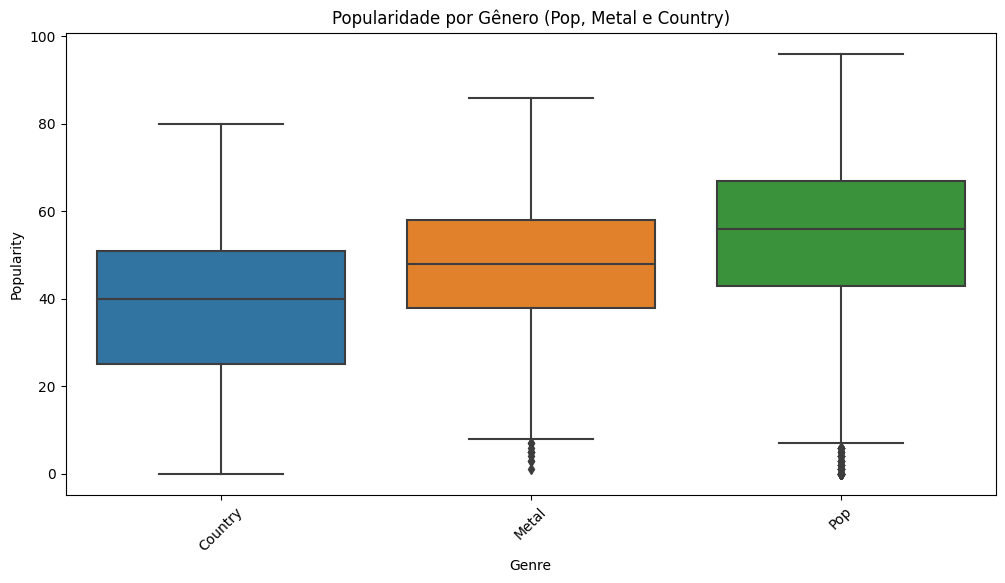

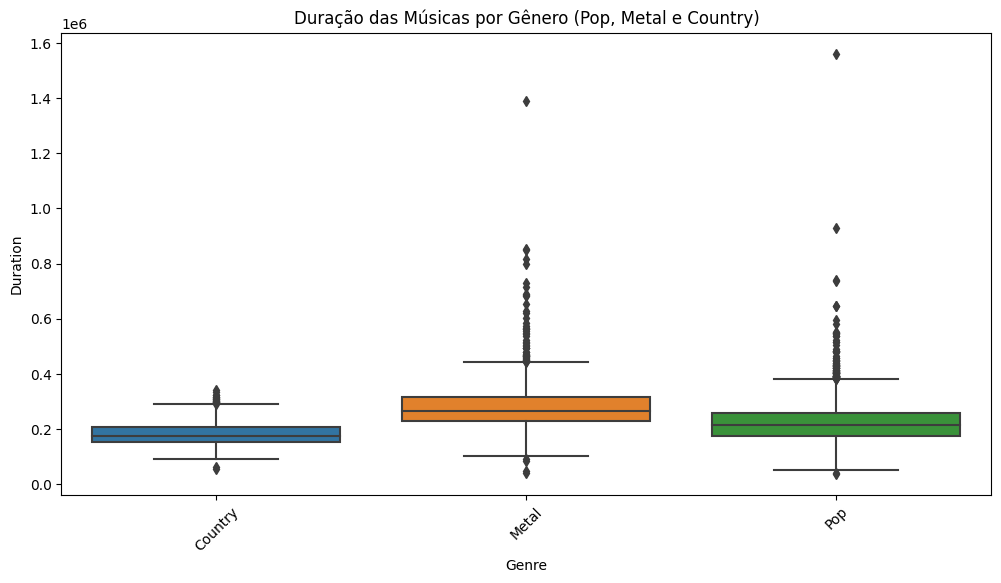

In [9]:
# Filtrar os dados para incluir apenas os gêneros desejados
filtered_data = data[data['Genre'].isin(['Pop', 'Metal', 'Country'])]

# Gráfico de distribuição de gêneros filtrados
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='Genre', order=filtered_data['Genre'].value_counts().index)
plt.title('Distribuição de Gêneros Musicais (Pop, Metal e Country)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de boxplot para analisar a popularidade por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Genre', y='Popularity')
plt.title('Popularidade por Gênero (Pop, Metal e Country)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de boxplot para analisar a duração por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Genre', y='Duration')
plt.title('Duração das Músicas por Gênero (Pop, Metal e Country)')
plt.xticks(rotation=45)
plt.show()


<h1>Gráfico de Popularidade por ano:</h1>

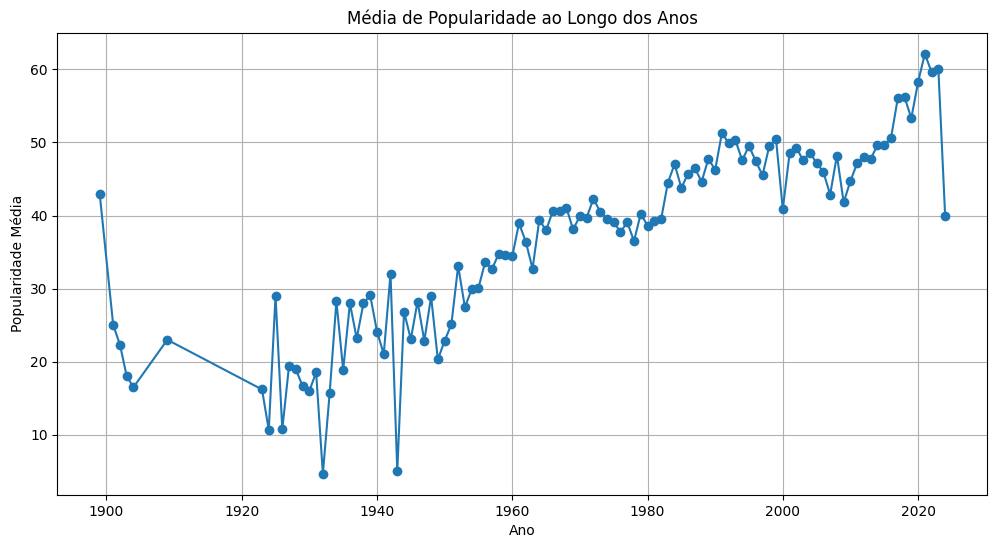

In [10]:
# Gráfico de média de popularidade por ano
plt.figure(figsize=(12, 6))
data.groupby('Year')['Popularity'].mean().plot(kind='line', marker='o')
plt.title('Média de Popularidade ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.grid()
plt.show()

<h1>Filtro de popularidade para os 3 gêneros mais presentes:</h1>

<Figure size 1200x600 with 0 Axes>

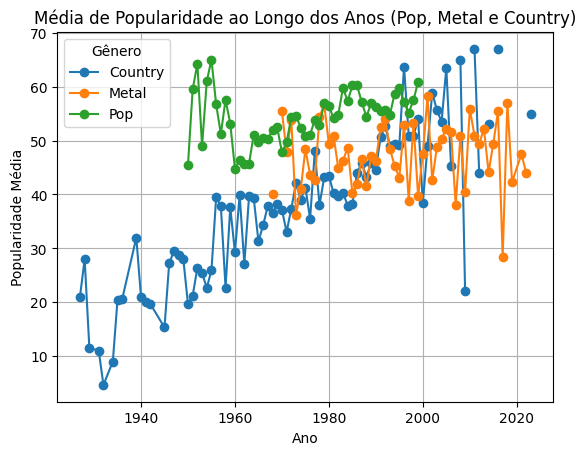

In [11]:
# Filtrar os dados para incluir apenas os gêneros desejados
filtered_data = data[data['Genre'].isin(['Pop', 'Metal', 'Country'])]

# Calcular a média de popularidade por ano e gênero
mean_popularity = filtered_data.groupby(['Year', 'Genre'])['Popularity'].mean().unstack()

# Gráfico de média de popularidade ao longo dos anos
plt.figure(figsize=(12, 6))
mean_popularity.plot(kind='line', marker='o')
plt.title('Média de Popularidade ao Longo dos Anos (Pop, Metal e Country)')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.grid()
plt.legend(title='Gênero')
plt.show()

<h1>Gráfico de dispersão para todos os generos:</h1>

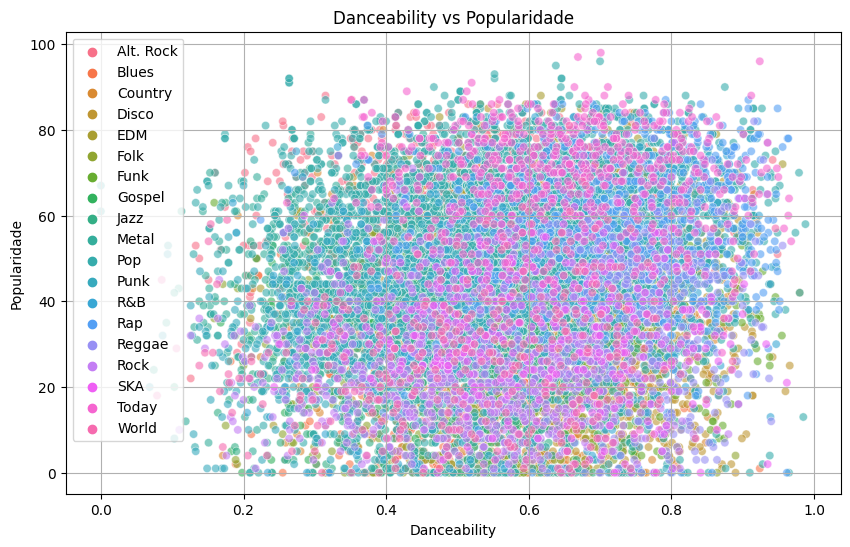

In [12]:
# Gráfico de dispersão entre Danceability e Popularidade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Danceability', y='Popularity', hue='Genre', alpha=0.6)
plt.title('Danceability vs Popularidade')
plt.xlabel('Danceability')
plt.ylabel('Popularidade')
plt.legend(loc='upper left')
plt.grid()
plt.show()

<h1>Dispersão dos 3 mais presentes:</h1>

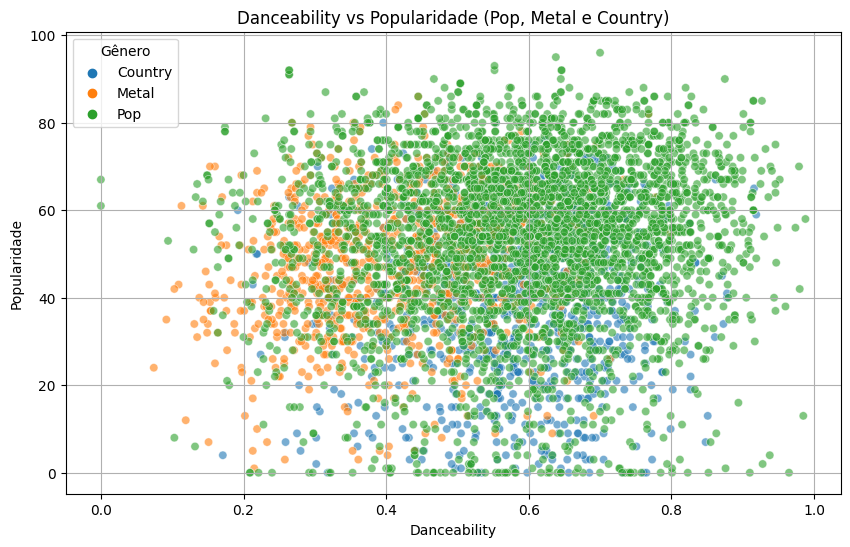

In [13]:
# Filtrar os dados para incluir apenas os gêneros desejados
filtered_data = data[data['Genre'].isin(['Pop', 'Metal', 'Country'])]

# Gráfico de dispersão entre Danceability e Popularidade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Danceability', y='Popularity', hue='Genre', alpha=0.6)
plt.title('Danceability vs Popularidade (Pop, Metal e Country)')
plt.xlabel('Danceability')
plt.ylabel('Popularidade')
plt.legend(title='Gênero', loc='upper left')
plt.grid()
plt.show()


<h1>Duração média das músicas por genêro:</h1>

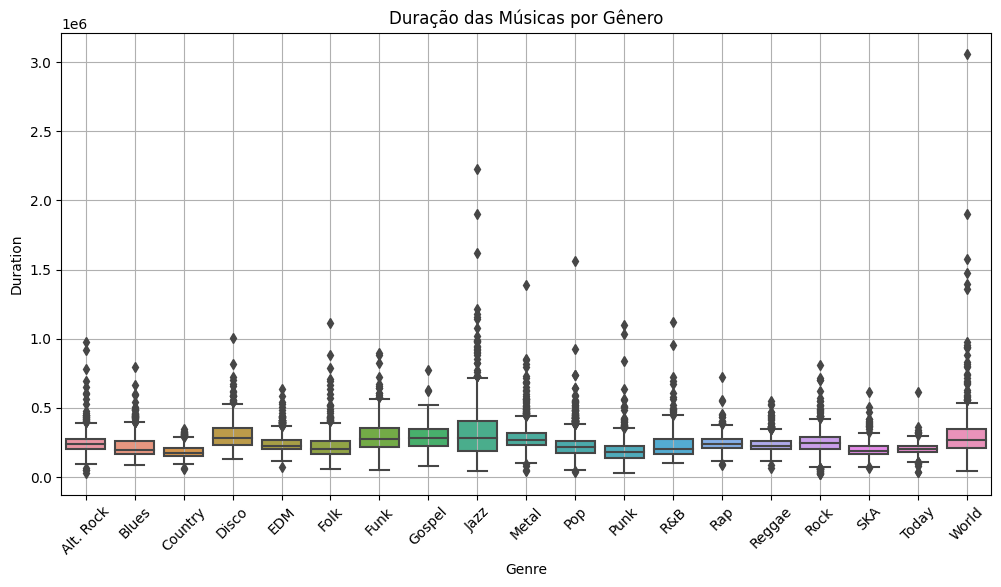

In [14]:
# Boxplot da duração das músicas por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Genre', y='Duration')
plt.title('Duração das Músicas por Gênero')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Matriz de Correlação

A matriz de correlação é uma ferramenta estatística que permite visualizar a relação entre várias variáveis em um conjunto de dados. Ela mostra como duas variáveis estão relacionadas entre si, indicando a força e a direção dessa relação.

## Interpretação da Matriz de Correlação:

- **Valores Variando de -1 a 1**:
  - **1**: Correlação positiva perfeita. Quando uma variável aumenta, a outra também aumenta.
  - **-1**: Correlação negativa perfeita. Quando uma variável aumenta, a outra diminui.
  - **0**: Nenhuma correlação. Não há relação linear entre as variáveis.

- **Uso Prático**: 
  - Ajuda a identificar padrões e tendências em dados musicais, como a relação entre popularidade, energia, e danceability.
  - Facilita a escolha de variáveis relevantes para modelos de predição.

A visualização da matriz de correlação permite identificar rapidamente as variáveis que mais influenciam umas às outras, sendo uma ferramenta essencial para a análise exploratória de dados.


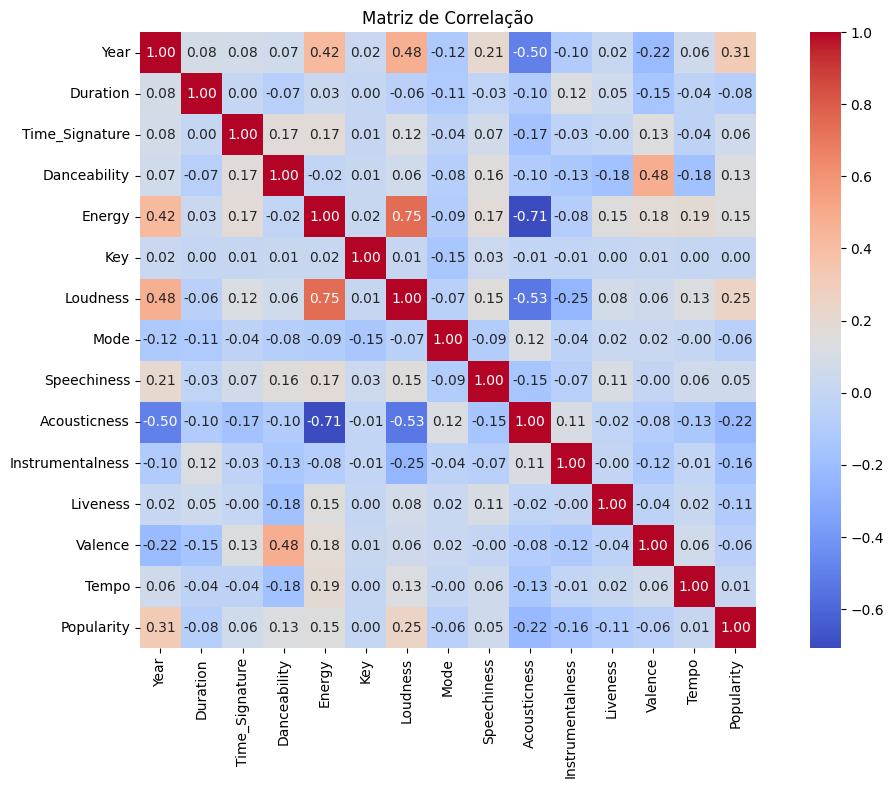

In [15]:
# Filtrar apenas colunas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Matriz de correlação
plt.figure(figsize=(14, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()


---
# Introdução à Predição de Valência Musical

Essa predição utiliza as variáveis **Danceability**, **Energy**, **Loudness**, **Acousticness** e **Tempo** como variáveis independentes (X), enquanto a variável dependente (Y) é a **Valência**, que representa a positividade de uma música. O nosso interesse nesta predição é entender como essas características acústicas influenciam a valência das músicas, permitindo uma análise mais profunda sobre as emoções que diferentes faixas musicais podem evocar.

Para alcançar esse objetivo, implementamos cinco modelos de aprendizado de máquina: **Support Vector Classifier (SVC)**, **K-Nearest Neighbors (KNN)**, **Random Forest**, **Decision Tree** e **Logistic Regression**. Cada modelo foi treinado e avaliado com base em um conjunto de dados de músicas, com o intuito de prever a valência com precisão. A análise dos resultados permitirá identificar quais características têm um impacto mais significativo na percepção da valência musical.


# Random Forest

In [16]:
# Importando as bibliotecas necessárias para o trabalho.
import pandas as pd                # Para manipulação de dados em DataFrames
import numpy as np                 # Para operações numéricas
from sklearn.model_selection import train_test_split  # Para dividir os dados em conjuntos de treino e teste
from sklearn.ensemble import RandomForestRegressor    # Algoritmo Random Forest para regressão
from sklearn.metrics import mean_squared_error        # Para calcular o erro quadrático médio
import matplotlib.pyplot as plt    # Para visualização
import seaborn as sns              # Para gráficos estatísticos

# Configurando estilo de visualização
sns.set(style="whitegrid")

In [17]:
# Selecionando as características independentes (features) e a variável dependente (target)
X = data[['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Tempo']]  # Características acústicas
y = data['Valence']  # A variável que queremos prever (valência musical)

# Exibindo as características selecionadas e a variável alvo
print(X.head())
print(y.head())


   Danceability  Energy  Loudness  Acousticness    Tempo
0         0.616   0.511   -15.894       0.03840  132.015
1         0.770   0.459   -17.453       0.11200  133.351
2         0.593   0.816    -7.293       0.00449   99.978
3         0.861   0.385   -10.057       0.15400  117.913
4         0.622   0.876    -6.310       0.01930  104.970
0    0.604
1    0.963
2    0.519
3    0.494
4    0.867
Name: Valence, dtype: float64


In [18]:
# Dividindo os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibindo a forma dos conjuntos de treino e teste
print("Conjunto de treino:", X_train.shape, y_train.shape)
print("Conjunto de teste:", X_test.shape, y_test.shape)


Conjunto de treino: (12120, 5) (12120,)
Conjunto de teste: (3030, 5) (3030,)


In [19]:
# Criando o modelo de Random Forest para regressão
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árvores na floresta

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Exibindo mensagem de sucesso
print("Modelo treinado com sucesso!")


Modelo treinado com sucesso!


In [20]:
# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibindo as primeiras previsões
print("Previsões:", y_pred[:5])


Previsões: [0.516799 0.563091 0.4395   0.61346  0.78912 ]


In [21]:
# Calculando o erro quadrático médio (MSE) para avaliar a performance do modelo
mse = mean_squared_error(y_test, y_pred)

# Exibindo o resultado do MSE
print("Erro Quadrático Médio:", mse)


Erro Quadrático Médio: 0.035198787899329294


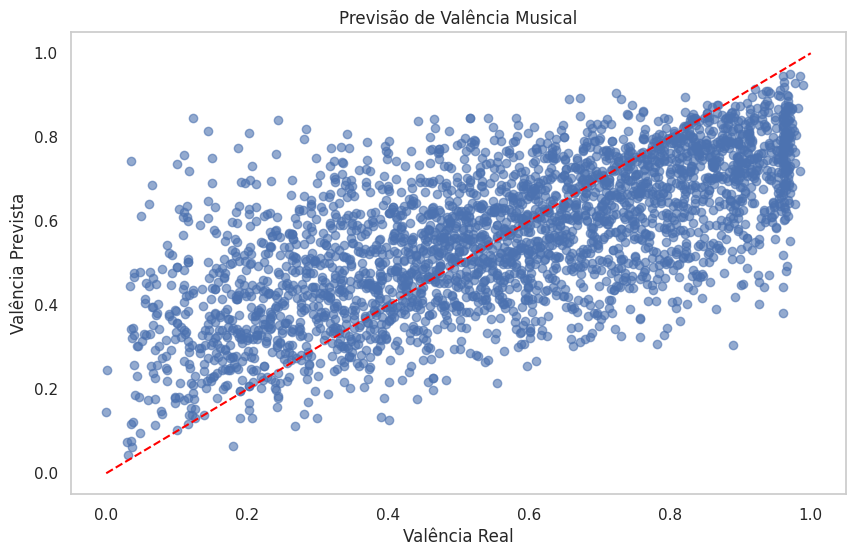

In [22]:
# Criando um gráfico de dispersão para comparar as previsões com os valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha ideal
plt.title('Previsão de Valência Musical')
plt.xlabel('Valência Real')
plt.ylabel('Valência Prevista')
plt.grid()
plt.show()


In [23]:
# Analisando a relação entre as previsões e os valores reais
results_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(results_df.head())

# Exibindo estatísticas descritivas dos resultados
print(results_df.describe())


         Real  Previsto
566    0.6390  0.516799
8617   0.4560  0.563091
8035   0.4020  0.439500
14772  0.0499  0.613460
6909   0.8670  0.789120
              Real     Previsto
count  3030.000000  3030.000000
mean      0.565376     0.564549
std       0.251810     0.172500
min       0.000010     0.043354
25%       0.369000     0.440413
50%       0.578000     0.572805
75%       0.778000     0.702325
max       0.989000     0.950060


---
# Mesma predição agora usando o KNN:

In [24]:
# Importando as bibliotecas necessárias para o trabalho.
import pandas as pd                # Para manipulação de dados em DataFrames
import numpy as np                 # Para operações numéricas
from sklearn.model_selection import train_test_split  # Para dividir os dados em conjuntos de treino e teste
from sklearn.neighbors import KNeighborsRegressor     # Algoritmo KNN para regressão
from sklearn.metrics import mean_squared_error        # Para calcular o erro quadrático médio
import matplotlib.pyplot as plt    # Para visualização
import seaborn as sns              # Para gráficos estatísticos

# Configurando estilo de visualização
sns.set(style="whitegrid")

In [25]:
# Selecionando as características independentes (features) e a variável dependente (target)
X = data[['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Tempo']]  # Características acústicas
y = data['Valence']  # A variável que queremos prever (valência musical)

# Exibindo as características selecionadas e a variável alvo
print(X.head())
print(y.head())

   Danceability  Energy  Loudness  Acousticness    Tempo
0         0.616   0.511   -15.894       0.03840  132.015
1         0.770   0.459   -17.453       0.11200  133.351
2         0.593   0.816    -7.293       0.00449   99.978
3         0.861   0.385   -10.057       0.15400  117.913
4         0.622   0.876    -6.310       0.01930  104.970
0    0.604
1    0.963
2    0.519
3    0.494
4    0.867
Name: Valence, dtype: float64


In [26]:
# Dividindo os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibindo a forma dos conjuntos de treino e teste
print("Conjunto de treino:", X_train.shape, y_train.shape)
print("Conjunto de teste:", X_test.shape, y_test.shape)

Conjunto de treino: (12120, 5) (12120,)
Conjunto de teste: (3030, 5) (3030,)


In [27]:
# Criando o modelo KNN para regressão
model = KNeighborsRegressor(n_neighbors=5)  # Utilizando 5 vizinhos

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Exibindo mensagem de sucesso
print("Modelo KNN treinado com sucesso!")

Modelo KNN treinado com sucesso!


In [28]:
# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibindo as primeiras previsões
print("Previsões:", y_pred[:5])

Previsões: [0.6842 0.6044 0.4928 0.7076 0.5958]


In [29]:
# Calculando o erro quadrático médio (MSE) para avaliar a performance do modelo
mse = mean_squared_error(y_test, y_pred)

# Exibindo o resultado do MSE
print("Erro Quadrático Médio:", mse)

Erro Quadrático Médio: 0.05969461956328482


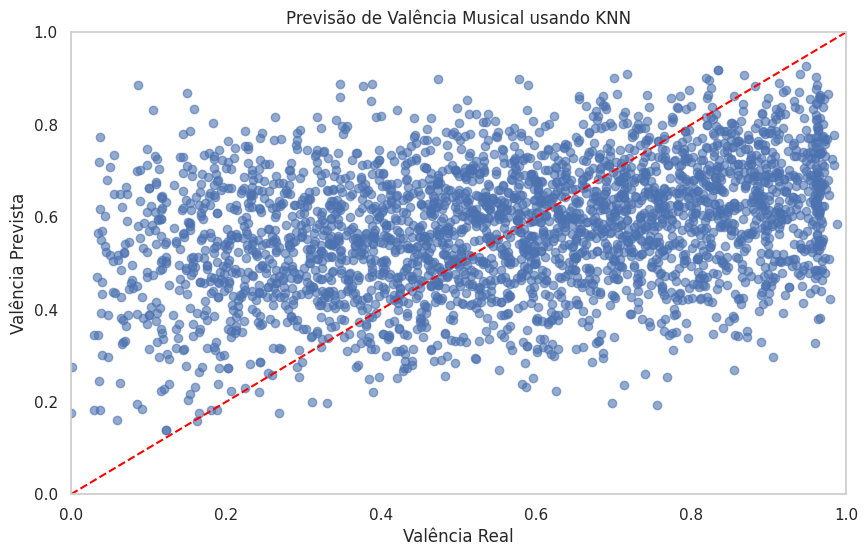

In [30]:
# Criando um gráfico de dispersão para comparar as previsões com os valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Previsão de Valência Musical usando KNN')
plt.xlabel('Valência Real')
plt.ylabel('Valência Prevista')
plt.xlim(0, 1)  # Limites para a valência
plt.ylim(0, 1)  # Limites para a valência
plt.grid()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha ideal
plt.show()

In [31]:
# Analisando a relação entre as previsões e os valores reais
results_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(results_df.head())

# Exibindo estatísticas descritivas dos resultados
print(results_df.describe())

         Real  Previsto
566    0.6390    0.6842
8617   0.4560    0.6044
8035   0.4020    0.4928
14772  0.0499    0.7076
6909   0.8670    0.5958
              Real     Previsto
count  3030.000000  3030.000000
mean      0.565376     0.575831
std       0.251810     0.137242
min       0.000010     0.138920
25%       0.369000     0.481250
50%       0.578000     0.582800
75%       0.778000     0.673150
max       0.989000     0.926600


---
# Usando Decision tree:

In [32]:
# Importando as bibliotecas necessárias para o trabalho.
import pandas as pd                # Para manipulação de dados em DataFrames
import numpy as np                 # Para operações numéricas
from sklearn.model_selection import train_test_split  # Para dividir os dados em conjuntos de treino e teste
from sklearn.tree import DecisionTreeClassifier  # Algoritmo de Árvore de Decisão
from sklearn.metrics import classification_report, confusion_matrix  # Para avaliação do modelo
import matplotlib.pyplot as plt    # Para visualização
import seaborn as sns              # Para gráficos estatísticos

# Configurando estilo de visualização
sns.set(style="whitegrid")

In [33]:
# Selecionando as características independentes (features) e a variável dependente (target)
X = data[['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Tempo']]  # Características acústicas

# Para a árvore de decisão, vamos transformar a variável 'Valence' em categorias discretas
# Por exemplo, classificando a valência em baixo, médio e alto
y = pd.cut(data['Valence'], bins=[-0.1, 0.3, 0.6, 1.0], labels=['Baixo', 'Médio', 'Alto'])

# Exibindo as características selecionadas e a variável alvo
print(X.head())
print(y.head())

   Danceability  Energy  Loudness  Acousticness    Tempo
0         0.616   0.511   -15.894       0.03840  132.015
1         0.770   0.459   -17.453       0.11200  133.351
2         0.593   0.816    -7.293       0.00449   99.978
3         0.861   0.385   -10.057       0.15400  117.913
4         0.622   0.876    -6.310       0.01930  104.970
0     Alto
1     Alto
2    Médio
3    Médio
4     Alto
Name: Valence, dtype: category
Categories (3, object): ['Baixo' < 'Médio' < 'Alto']


In [34]:
# Dividindo os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibindo a forma dos conjuntos de treino e teste
print("Conjunto de treino:", X_train.shape, y_train.shape)
print("Conjunto de teste:", X_test.shape, y_test.shape)

Conjunto de treino: (12120, 5) (12120,)
Conjunto de teste: (3030, 5) (3030,)


In [35]:
# Criando o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)  # Inicializando o modelo com um estado aleatório

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Exibindo mensagem de sucesso
print("Modelo de Árvore de Decisão treinado com sucesso!")


Modelo de Árvore de Decisão treinado com sucesso!


In [36]:
# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibindo as primeiras previsões
print("Previsões:", y_pred[:5])

Previsões: ['Médio' 'Alto' 'Médio' 'Alto' 'Alto']


Relatório de Classificação:
               precision    recall  f1-score   support

        Alto       0.67      0.67      0.67      1415
       Baixo       0.44      0.45      0.45       551
       Médio       0.48      0.48      0.48      1064

    accuracy                           0.56      3030
   macro avg       0.53      0.53      0.53      3030
weighted avg       0.56      0.56      0.56      3030



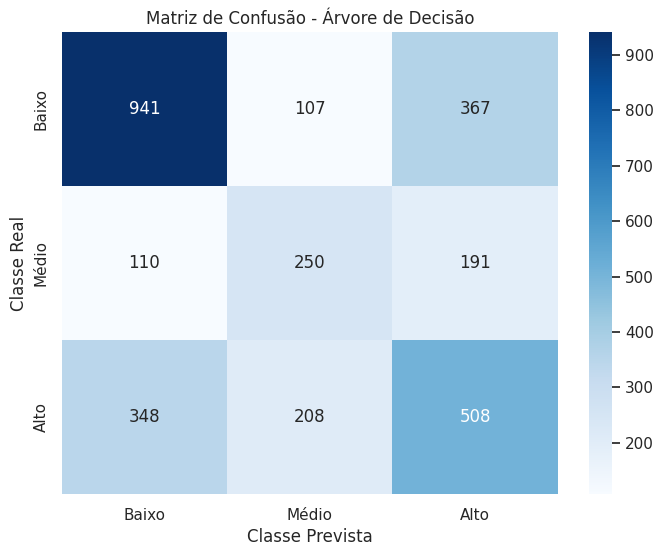

In [37]:
# Gerando o relatório de classificação para avaliar a performance do modelo
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", report)

# Gerando a matriz de confusão para visualizar o desempenho do modelo
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo', 'Médio', 'Alto'], yticklabels=['Baixo', 'Médio', 'Alto'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

In [38]:
# Analisando a relação entre as previsões e os valores reais
results_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(results_df.head())

# Exibindo estatísticas descritivas dos resultados
print(results_df.describe())

        Real Previsto
566     Alto    Médio
8617   Médio     Alto
8035   Médio    Médio
14772  Baixo     Alto
6909    Alto     Alto
        Real Previsto
count   3030     3030
unique     3        3
top     Alto     Alto
freq    1415     1399


---
# Usando Logistic Regretion:

In [39]:
# Importando as bibliotecas necessárias para o trabalho.
import pandas as pd                # Para manipulação de dados em DataFrames
import numpy as np                 # Para operações numéricas
from sklearn.model_selection import train_test_split  # Para dividir os dados em conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression  # Algoritmo de Regressão Logística
from sklearn.metrics import classification_report, confusion_matrix  # Para avaliação do modelo
import matplotlib.pyplot as plt    # Para visualização
import seaborn as sns              # Para gráficos estatísticos

# Configurando estilo de visualização
sns.set(style="whitegrid")

In [40]:
# Selecionando as características independentes (features) e a variável dependente (target)
X = data[['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Tempo']]  # Características acústicas

# Transformando a variável 'Valence' em categorias discretas
y = pd.cut(data['Valence'], bins=[-0.1, 0.3, 0.6, 1.0], labels=['Baixo', 'Médio', 'Alto'])

# Exibindo as características selecionadas e a variável alvo
print(X.head())
print(y.head())

   Danceability  Energy  Loudness  Acousticness    Tempo
0         0.616   0.511   -15.894       0.03840  132.015
1         0.770   0.459   -17.453       0.11200  133.351
2         0.593   0.816    -7.293       0.00449   99.978
3         0.861   0.385   -10.057       0.15400  117.913
4         0.622   0.876    -6.310       0.01930  104.970
0     Alto
1     Alto
2    Médio
3    Médio
4     Alto
Name: Valence, dtype: category
Categories (3, object): ['Baixo' < 'Médio' < 'Alto']


In [41]:
# Dividindo os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibindo a forma dos conjuntos de treino e teste
print("Conjunto de treino:", X_train.shape, y_train.shape)
print("Conjunto de teste:", X_test.shape, y_test.shape)


Conjunto de treino: (12120, 5) (12120,)
Conjunto de teste: (3030, 5) (3030,)


In [42]:
# Criando o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)  # Inicializando o modelo com um número máximo de iterações

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Exibindo mensagem de sucesso
print("Modelo de Regressão Logística treinado com sucesso!")


Modelo de Regressão Logística treinado com sucesso!


In [43]:
# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibindo as primeiras previsões
print("Previsões:", y_pred[:5])


Previsões: ['Médio' 'Médio' 'Médio' 'Alto' 'Alto']


Relatório de Classificação:
               precision    recall  f1-score   support

        Alto       0.64      0.80      0.71      1415
       Baixo       0.59      0.26      0.36       551
       Médio       0.47      0.45      0.46      1064

    accuracy                           0.58      3030
   macro avg       0.57      0.50      0.51      3030
weighted avg       0.57      0.58      0.56      3030



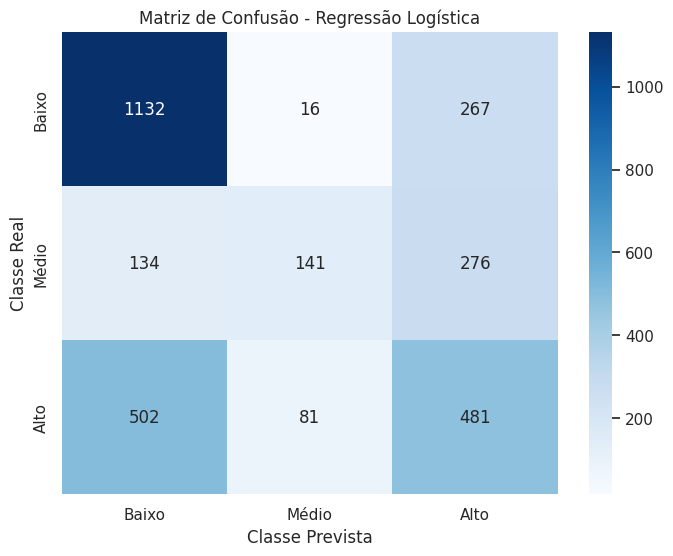

In [44]:
# Gerando o relatório de classificação para avaliar a performance do modelo
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", report)

# Gerando a matriz de confusão para visualizar o desempenho do modelo
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo', 'Médio', 'Alto'], yticklabels=['Baixo', 'Médio', 'Alto'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()


In [45]:
# Analisando a relação entre as previsões e os valores reais
results_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(results_df.head())

# Exibindo estatísticas descritivas dos resultados
print(results_df.describe())


        Real Previsto
566     Alto    Médio
8617   Médio    Médio
8035   Médio    Médio
14772  Baixo     Alto
6909    Alto     Alto
        Real Previsto
count   3030     3030
unique     3        3
top     Alto     Alto
freq    1415     1768


# Usando SVC:

Matriz de Confusão:
[[ 661  566]
 [ 300 1503]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.54      0.60      1227
           1       0.73      0.83      0.78      1803

    accuracy                           0.71      3030
   macro avg       0.71      0.69      0.69      3030
weighted avg       0.71      0.71      0.71      3030

Acurácia: 0.71


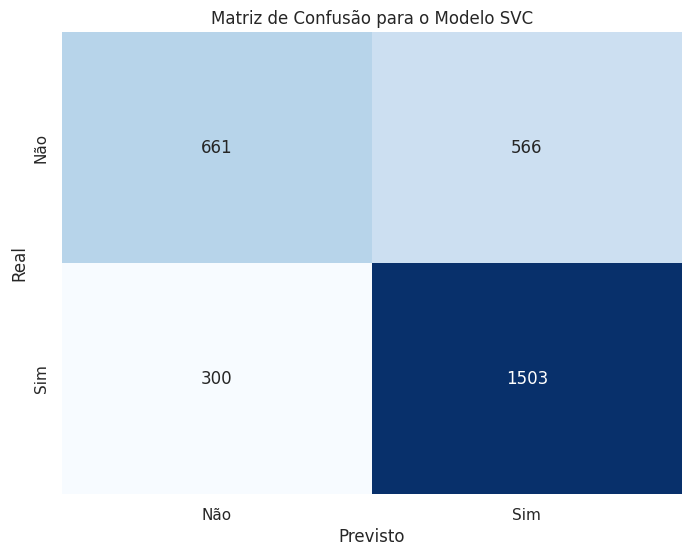

In [46]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o conjunto de dados
data = pd.read_csv('../input/basehits/ClassicHit.csv')

# Transformando a variável 'Valence' em categórica
# Aqui definimos um limiar para classificar em 'Baixa' ou 'Alta'
data['Valence'] = data['Valence'].apply(lambda x: 1 if x > 0.5 else 0)

# Selecionando as variáveis independentes (X) e a variável dependente (Y)
X = data[['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Tempo']]
y = data['Valence']

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando os dados para melhorar a performance do SVC
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando e treinando o modelo SVC
model = SVC(kernel='linear')  # Você pode experimentar outros kernels como 'rbf' ou 'poly'
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")

# Visualizando a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.title('Matriz de Confusão para o Modelo SVC')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


---
# Resultados:

In [47]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred)
knn_classification_report = classification_report(y_test, knn_y_pred, output_dict=True)

# SVC
from sklearn.svm import SVC

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, y_pred)
svc_confusion_matrix = confusion_matrix(y_test, y_pred)
svc_classification_report = classification_report(y_test, y_pred, output_dict=True)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, rf_y_pred)
random_forest_confusion_matrix = confusion_matrix(y_test, rf_y_pred)
random_forest_classification_report = classification_report(y_test, rf_y_pred, output_dict=True)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, dt_y_pred)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
decision_tree_classification_report = classification_report(y_test, dt_y_pred, output_dict=True)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, log_y_pred)
logistic_regression_confusion_matrix = confusion_matrix(y_test, log_y_pred)
logistic_regression_classification_report = classification_report(y_test, log_y_pred, output_dict=True)

# Agora que você tem todos os resultados, vamos armazená-los em um dicionário
resultados = {}

# Adicionando resultados do SVC
resultados['SVC'] = {
    'Acurácia': svc_accuracy,
    'Matriz de Confusão': svc_confusion_matrix,
    'Relatório de Classificação': svc_classification_report
}

# Adicionando resultados do KNN
resultados['KNN'] = {
    'Acurácia': knn_accuracy,
    'Matriz de Confusão': knn_confusion_matrix,
    'Relatório de Classificação': knn_classification_report
}

# Adicionando resultados do Random Forest
resultados['Random Forest'] = {
    'Acurácia': random_forest_accuracy,
    'Matriz de Confusão': random_forest_confusion_matrix,
    'Relatório de Classificação': random_forest_classification_report
}

# Adicionando resultados do Decision Tree
resultados['Decision Tree'] = {
    'Acurácia': decision_tree_accuracy,
    'Matriz de Confusão': decision_tree_confusion_matrix,
    'Relatório de Classificação': decision_tree_classification_report
}

# Adicionando resultados da Logistic Regression
resultados['Logistic Regression'] = {
    'Acurácia': logistic_regression_accuracy,
    'Matriz de Confusão': logistic_regression_confusion_matrix,
    'Relatório de Classificação': logistic_regression_classification_report
}

# Função para exibir resultados
def exibir_resultados(resultados):
    for modelo, resultado in resultados.items():
        print(f"Modelo: {modelo}")
        print(f"Acurácia: {resultado['Acurácia']:.2f}")
        print("Matriz de Confusão:")
        print(resultado['Matriz de Confusão'])
        print("\nRelatório de Classificação:")
        
        # Use o y_test e as previsões específicas do modelo para exibir o relatório
        if modelo == 'SVC':
            y_pred = svc_model.predict(X_test)  # Previsões para SVC
        elif modelo == 'KNN':
            y_pred = knn_model.predict(X_test)  # Previsões para KNN
        elif modelo == 'Random Forest':
            y_pred = rf_model.predict(X_test)  # Previsões para Random Forest
        elif modelo == 'Decision Tree':
            y_pred = dt_model.predict(X_test)  # Previsões para Decision Tree
        elif modelo == 'Logistic Regression':
            y_pred = log_model.predict(X_test)  # Previsões para Logistic Regression
        
        print(classification_report(y_test, y_pred))  # Aqui você pode usar y_test e y_pred
        print("=" * 50)

# Exibindo os resultados de todos os modelos
exibir_resultados(resultados)

# Identificando o melhor modelo
melhor_modelo = max(resultados, key=lambda x: resultados[x]['Acurácia'])
print(f"O melhor modelo para nossa predição é: {melhor_modelo} com uma acurácia de {resultados[melhor_modelo]['Acurácia']:.2f}.")


Modelo: SVC
Acurácia: 0.71
Matriz de Confusão:
[[ 661  566]
 [ 300 1503]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.54      0.60      1227
           1       0.73      0.83      0.78      1803

    accuracy                           0.71      3030
   macro avg       0.71      0.69      0.69      3030
weighted avg       0.71      0.71      0.71      3030

Modelo: KNN
Acurácia: 0.72
Matriz de Confusão:
[[ 761  466]
 [ 396 1407]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      1227
           1       0.75      0.78      0.77      1803

    accuracy                           0.72      3030
   macro avg       0.70      0.70      0.70      3030
weighted avg       0.71      0.72      0.71      3030

Modelo: Random Forest
Acurácia: 0.75
Matriz de Confusão:
[[ 797  430]
 [ 319 1484]]

Relatório de Classificação:
              precision    